In [1]:
#STEP 1 — Load the dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
#STEP 2 — Basic Info + Check Class Balance
df.info()
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

target
1    357
0    212
Name: count, dtype: int64

In [3]:
#STEP 3 — Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
#STEP 4 — Scale the features (fit only on training data)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit + transform
X_test_scaled  = scaler.transform(X_test)        # only transform

In [6]:
#step 5- Train Logistic Regression (NO SMOTE)
from sklearn.linear_model import LogisticRegression

clf_no_smote = LogisticRegression(
    max_iter=500,
    solver="liblinear",
    random_state=42
)

clf_no_smote.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [7]:
#step 6 - Predictions
y_pred = clf_no_smote.predict(X_test_scaled)
y_prob = clf_no_smote.predict_proba(X_test_scaled)[:, 1]

In [8]:
#step 7 - Evaluate performance (no SMOTE)
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

print("Accuracy (no SMOTE):", accuracy_score(y_test, y_pred))
print("Recall (no SMOTE):", recall_score(y_test, y_pred))
print("F1 Score (no SMOTE):", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

Accuracy (no SMOTE): 0.9824561403508771
Recall (no SMOTE): 0.9861111111111112
F1 Score (no SMOTE): 0.9861111111111112
AUC: 0.9957010582010581


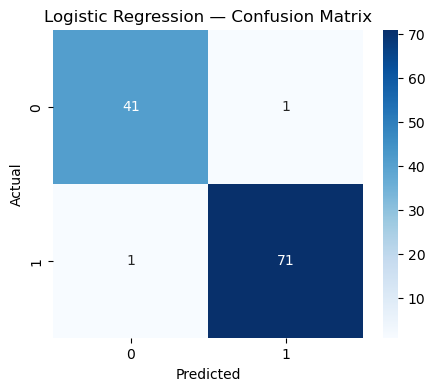

In [9]:
#Evaluate the Baseline Logistic Regression Model
#CONFUSION MATRIX
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure folder exists
os.makedirs("figures", exist_ok=True)

# Compute confusion matrix
y_pred_lr = clf_no_smote.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression — Confusion Matrix')

# SAVE FIRST
plt.savefig('figures/confusion_matrix_logistic_regression.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [10]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

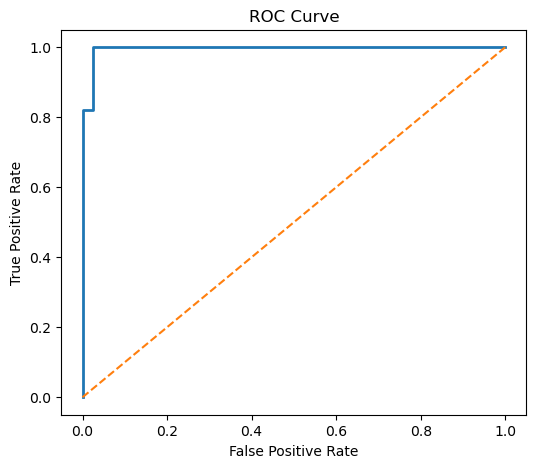

In [11]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    random_state=42,
    max_iter=2000,
    solver='liblinear'
)

model.fit(X_train_scaled, y_train)

print(model.coef_)

[[-0.49311166 -0.55620444 -0.46098799 -0.54817066 -0.19610022  0.66098506
  -0.61843898 -0.7058947  -0.17512683  0.17921326 -1.08792868  0.25162063
  -0.54628003 -0.95809577 -0.16441023  0.65059928  0.1772272  -0.42810634
   0.34924358  0.42338817 -0.94600048 -1.24227216 -0.76480696 -0.97928219
  -0.75956669  0.04956151 -0.82718017 -0.94529551 -0.9287294  -0.18147768]]


In [13]:
print("Intercept:", model.intercept_)
print("Coefficients shape:", model.coef_.shape)

Intercept: [0.24725844]
Coefficients shape: (1, 30)


In [14]:
#Feature Importance (Optional)
coeffs = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient", key=abs, ascending=False)

coeffs.head(10)

,feature,coefficient
21,worst texture,-1.242272
10,radius error,-1.087929
23,worst area,-0.979282
13,area error,-0.958096
20,worst radius,-0.946000
27,worst concave points,-0.945296
28,worst symmetry,-0.928729
26,worst concavity,-0.827180
22,worst perimeter,-0.764807
24,worst smoothness,-0.759567


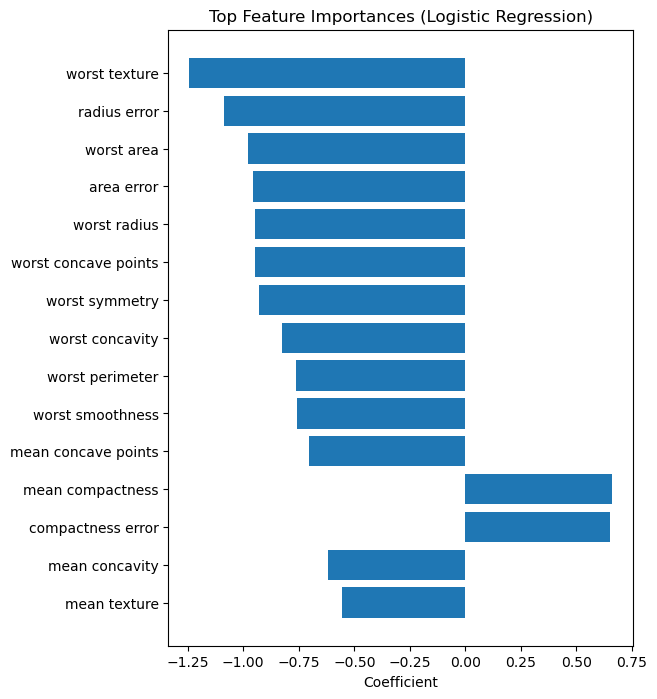

In [15]:
plt.figure(figsize=(6,8))
plt.barh(coeffs["feature"].head(15), coeffs["coefficient"].head(15))
plt.xlabel("Coefficient")
plt.title("Top Feature Importances (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()

In [16]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,       # number of trees in the forest
    max_depth=None,         # maximum depth of each tree (None = grow until leaves pure or min_samples)
    min_samples_split=2,    # min samples to split an internal node
    min_samples_leaf=1,     # min samples required at a leaf node
    max_features="sqrt",    # number of features to consider when looking for best split
    class_weight=None,      # or "balanced" if you prefer weight instead of SMOTE
    bootstrap=True,         # whether to use bootstrap samples to build trees
    n_jobs=-1,              # use all cores
    random_state=42
)

In [17]:
#Fit the model
rf.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
#Make predictions & probabilities
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [19]:
#Evaluate performance (important metrics)
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_proba_rf)

print("Accuracy:", acc)
print("Recall:", rec)
print("F1 Score:", f1)
print("AUC:", auc)
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.956140350877193
Recall: 0.9722222222222222
F1 Score: 0.9655172413793104
AUC: 0.9932208994708995

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



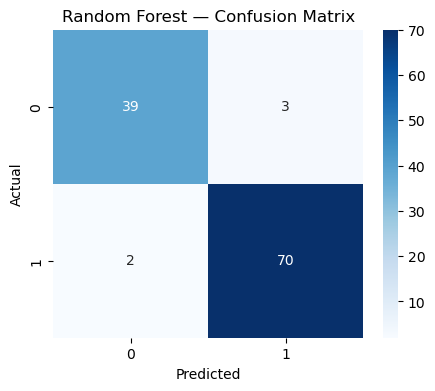

In [20]:
#Confusion matrix (visual)
import matplotlib.pyplot as plt
import seaborn as sns
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest — Confusion Matrix')

# SAVE FIRST
plt.savefig('figures/confusion_matrix_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [68]:
#Feature importance (what the model used)
import pandas as pd
import numpy as np

feat_imp = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

feat_imp.head(15)

,feature,importance
22,worst perimeter,0.133100
23,worst area,0.128052
27,worst concave points,0.108107
7,mean concave points,0.094414
20,worst radius,0.090639
0,mean radius,0.058662
2,mean perimeter,0.055242
3,mean area,0.049938
6,mean concavity,0.046207
26,worst concavity,0.035357


In [21]:
#Perform Hyperparameter Tuning for Random Forest using RandomizedSearchCV
#Step 1: Import Required Tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

In [22]:
#Step 2: Define Random Forest Model and Parameter Search Space
# Base model
rf = RandomForestClassifier(random_state=42)

# Parameter distributions for random search
param_dist = {
    "n_estimators": randint(100, 1000),            # number of trees
    "max_depth": randint(3, 30),                   # maximum tree depth
    "min_samples_split": randint(2, 20),           # minimum samples to split a node
    "min_samples_leaf": randint(1, 10),            # minimum samples at leaf nodes
    "max_features": ["sqrt", "log2", None],        # number of features considered per split
    "bootstrap": [True, False],                    # bootstrap sampling
    "class_weight": [None, "balanced"]             # handling imbalance
}

In [23]:
#Step 3: Randomized Search CV
# Lighter configuration for laptops
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,          # number of models to try (not 100)
    cv=3,               # 3-fold CV instead of 5
    scoring="f1",
    verbose=2,
    n_jobs=1,           # use ONE CPU, prevents freezing
    random_state=42
)

In [24]:
#step 4
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=17, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=17, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced, max_depth=17, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.7s
[CV] END bootstrap=True, class_weight=None, max_depth=13, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=971; total time=   3.9s
[CV] END bootstrap=True, class_weight=None, max_depth=13, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=971; total time=   3.7s
[CV] END bootstrap=True, class_weight=None, max_depth=13, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=971; total time=   4.

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'max_depth': <scipy.stats....001BDF8FBBCE0>, 'max_features': ['sqrt', 'log2', ...], ...}"
,n_iter,20
,scoring,'f1'
,n_jobs,1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [25]:
#Step 5 — Extract and Evaluate the Best Model
# Best model after tuning
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'bootstrap': False, 'class_weight': None, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 661}


In [26]:
#evaluate
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, recall_score, f1_score

# Predict on test set 
y_pred_best = best_rf.predict(X_test_scaled)
y_proba_best = best_rf.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1:", f1_score(y_test, y_pred_best))
print("AUC:", roc_auc_score(y_test, y_proba_best))

print("\nClassification report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.956140350877193
Recall: 0.9722222222222222
F1: 0.9655172413793104
AUC: 0.9927248677248677

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [27]:
#Step 6 — Feature Importance from the Tuned Model
import pandas as pd

rf_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": best_rf.feature_importances_
}).sort_values(by="importance", ascending=False)

rf_importance.head(15)

,feature,importance
23,worst area,0.127061
22,worst perimeter,0.119522
20,worst radius,0.115275
27,worst concave points,0.106095
7,mean concave points,0.076649
0,mean radius,0.055667
3,mean area,0.054380
2,mean perimeter,0.052925
6,mean concavity,0.046380
13,area error,0.039947


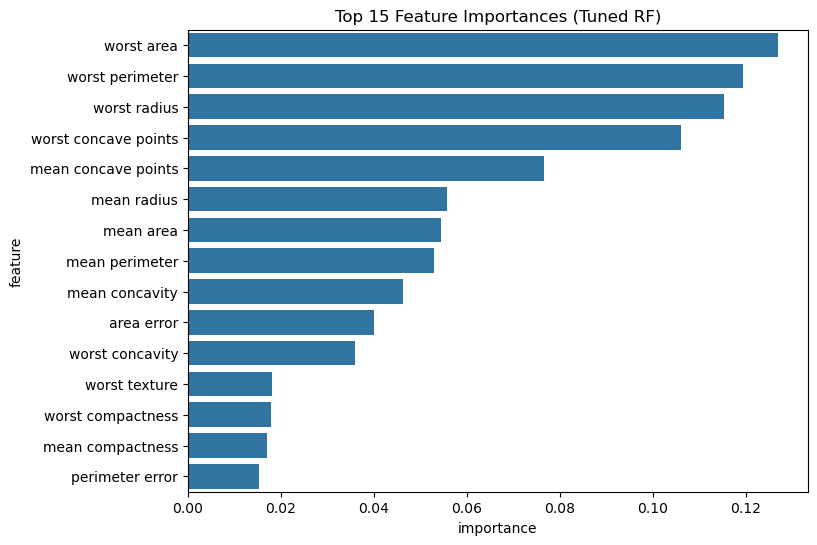

In [28]:
#Step 7 — Plot Feature Importances (Optional Visualization)
plt.figure(figsize=(8,6))
sns.barplot(data=rf_importance.head(15), x="importance", y="feature")
plt.title("Top 15 Feature Importances (Tuned RF)")
plt.show()

In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------

In [29]:
from xgboost import XGBClassifier

In [30]:
#Build a Simple XGBoost Model
model_xgb = XGBClassifier(
    n_estimators=200,        # number of boosted trees
    learning_rate=0.05,     # smaller → more stable
    max_depth=3,            # shallow trees generalize well
    subsample=0.9,          # use 90% of data for each tree
    colsample_bytree=0.9,   # use 90% of features per tree
    eval_metric='logloss',  # required for XGBoost 2.0+
    random_state=42
)

model_xgb.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [31]:
#Make Predictions
y_pred = model_xgb.predict(X_test_scaled)
y_proba = model_xgb.predict_proba(X_test_scaled)[:, 1]

In [32]:
#Evaluate Performance
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Recall: 0.9861111111111112
F1 Score: 0.9659863945578231
AUC: 0.9953703703703703

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [33]:
#Feature Importance Plot
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": model_xgb.feature_importances_
}).sort_values(by="importance", ascending=False)

importance_df.head(10)

,feature,importance
22,worst perimeter,0.208574
7,mean concave points,0.179852
23,worst area,0.128463
20,worst radius,0.125342
27,worst concave points,0.091793
3,mean area,0.023863
1,mean texture,0.020039
25,worst compactness,0.019292
21,worst texture,0.019069
26,worst concavity,0.017277


<Figure size 600x400 with 0 Axes>

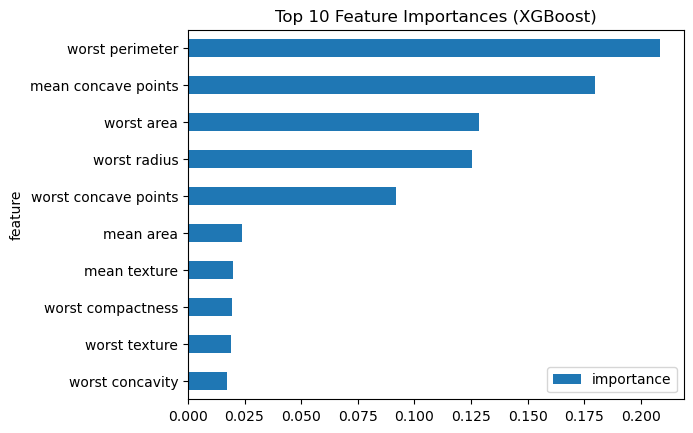

In [34]:
#plot
plt.figure(figsize=(6,4))
importance_df.head(10).plot(kind='barh', x='feature', y='importance')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

Top 15 features by permutation importance (metric = roc_auc):


,feature,importance_mean,importance_std
0,worst concave points,0.008929,0.004623
1,worst texture,0.007143,0.004429
2,worst perimeter,0.005280,0.004709
3,worst smoothness,0.003516,0.001433
4,mean concave points,0.003340,0.001730
5,area error,0.003142,0.002390
6,worst concavity,0.003086,0.001187
7,worst radius,0.002601,0.001984
8,worst area,0.002315,0.002351
9,mean texture,0.001323,0.001073


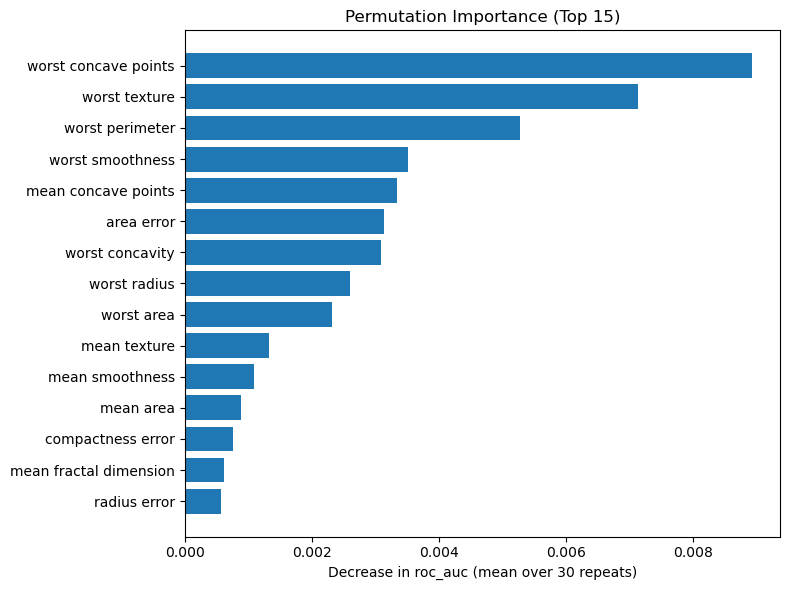

In [35]:
#Permutation Importance
# Permutation importance (fast, model-agnostic)
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Choose scoring metric for importance. For diagnostics I recommend 'roc_auc'.
scoring_metric = "roc_auc"   # alternatives: 'accuracy', 'f1', 'recall'

# Compute permutation importance on the test set (keeps test untouched)
result = permutation_importance(
    model_xgb,                    # the trained XGBoost model
    X_test_scaled,                # features (scaled)
    y_test,                       # true labels
    n_repeats=30,                 # repetitions for stability (30 is a good balance)
    random_state=42,
    scoring=scoring_metric,
    n_jobs=1                      # set 1 to avoid parallel issues in notebooks
)

# Build DataFrame of results
perm_df = pd.DataFrame({
    "feature": X.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False).reset_index(drop=True)

# Show top 15
print("Top 15 features by permutation importance (metric = {}):".format(scoring_metric))
display(perm_df.head(15))

# Plot top 15
plt.figure(figsize=(8,6))
plt.barh(perm_df.head(15)['feature'][::-1], perm_df.head(15)['importance_mean'][::-1])
plt.xlabel(f"Decrease in {scoring_metric} (mean over {result.importances.shape[1]} repeats)")
plt.title("Permutation Importance (Top 15)")
plt.tight_layout()
plt.show()

# Save results for later (we will use them for SHAP focus)
perm_df.to_csv("xgb_permutation_importance.csv", index=False)

In [45]:
pip install shap

   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.3 kB ? eta -:--:--
   ---------------------------------------- 549.3/549.3 kB 1.0 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 1.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.7 MB 1.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.7 MB 1.2 MB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.7 MB 1.0 MB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 1.1 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.11.3 requires h5py>=3.7.0, which is not installed.
scanpy 1.11.3 requires networkx>=2.7.1, which is not installed.
scanpy 1.11.3 requires patsy!=1.0.0, which is not installed.
scanpy 1.11.3 requires scipy<1.16.0,>=1.8.1, but you have scipy 1.16.3 which is incompatible.


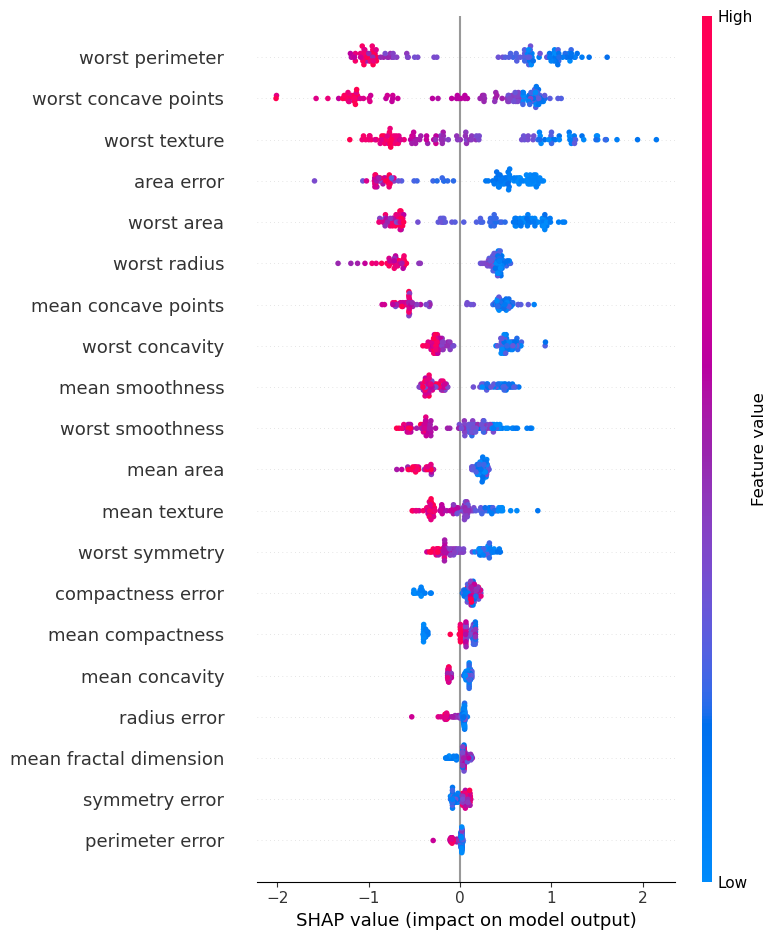

In [36]:
#SHAP Summary Plot (run this next)
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create SHAP explainer (TreeExplainer is optimized for XGBoost)
explainer = shap.TreeExplainer(model_xgb)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot (global importance + impact + direction)
shap.summary_plot(
    shap_values,
    X_test_scaled,
    feature_names=X.columns,
    plot_type="dot",
    max_display=20
)

In [37]:
model_xgb.classes_

array([0, 1])

In [38]:
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [39]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.target_names)

['malignant' 'benign']


In [40]:
import os

# Create 'figures' folder if it doesn't exist
os.makedirs('figures', exist_ok=True)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import shap

# -----------------------------

# -----------------------------
# 1) ROC Curve
# -----------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)  # y_prob = predicted probabilities from your model
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('figures/roc_curve.png')
plt.close()

# -----------------------------
# 2) SHAP Summary Plot
# -----------------------------
# Assuming you already have shap_values and X_test_scaled
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.savefig('figures/shap_summary.png')
plt.close()

print("All key figures saved in 'figures/' folder.")

All key figures saved in 'figures/' folder.
